# Market Analysis

In [1]:
import ffn 
from empyrical import alpha_beta
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation
import matplotlib as pyplot
import numpy as np
import pandas as pd

%matplotlib inline

import datetime as dt
#from datetime import datetime
from datetime import datetime, timedelta 
date = dt.datetime.now()
modified_date = date - timedelta(days=1)
e_= dt.datetime.strftime(modified_date, "%Y-%m-%d")


import matplotlib.pyplot as plt
import warnings
plt.style.use('dark_background')
warnings.simplefilter(action='ignore', category=FutureWarning)

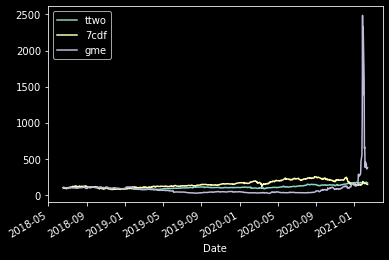

In [2]:
symbols = ['TTWO', '7CD.F', 'GME']

prices = ffn.get('TTWO, 7CD.F, GME', start='2016-01-01')
benchmark = ffn.get('spy', start='2016-01-01')
ax = prices.rebase().plot()

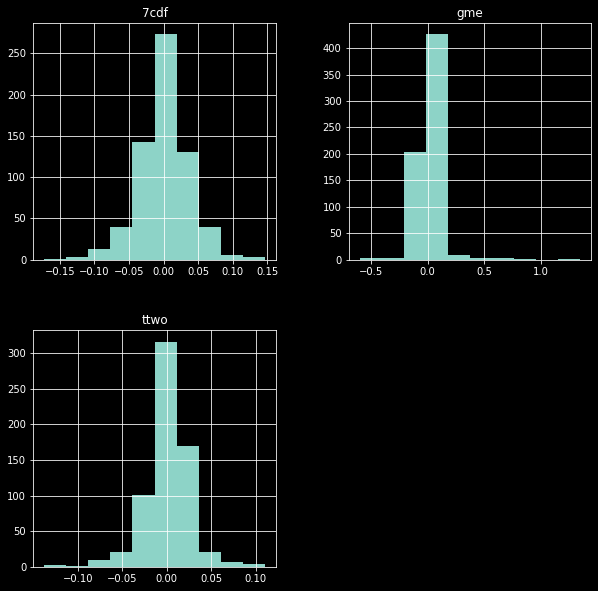

In [3]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(10,10))

In [4]:
stats = prices.calc_stats()

In [5]:
stats.display()

Stat                 ttwo        7cdf        gme
-------------------  ----------  ----------  ----------
Start                2018-06-18  2018-06-18  2018-06-18
End                  2021-02-12  2021-02-12  2021-02-12
Risk-free rate       0.00%       0.00%       0.00%

Total Return         65.60%      44.92%      275.11%
Daily Sharpe         0.69        0.54        1.01
Daily Sortino        1.09        0.89        2.23
CAGR                 20.92%      14.99%      64.51%
Max Drawdown         -38.67%     -48.55%     -85.52%
Calmar Ratio         0.54        0.31        0.75

MTD                  -0.29%      -13.71%     -83.88%
3m                   24.74%      -30.16%     370.80%
6m                   18.89%      -37.36%     1059.29%
YTD                  -3.15%      -3.21%      172.07%
1Y                   75.29%      -20.49%     1150.60%
3Y (ann.)            20.92%      14.99%      64.51%
5Y (ann.)            20.92%      14.99%      64.51%
10Y (ann.)           20.92%      14.99%      64.51%

In [10]:
for sym in symbols:
    stk = ffn.get(sym, start='2016-01-01')
    alpha, beta = alpha_beta(stk, benchmark)
    print(sym, beta)

TTWO 0.7998948555754225
7CD.F 0.357632027193713
GME -0.02136101394800433


# Portfolio Return & Efficient Frontier

We bought 3 stocks of Take-Two Interactive Software, 10 stocks of CD Projekt and 5 stocks of GameStop. We need to calculate the right return depending on the weights. 

In [7]:
returns = prices.pct_change()
weight = np.array([3, 10, 5])
t = np.sum(weight)
weights = weight/t 
# mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
# portfolio weights
#weights = np.asarray([0.4,0.2,0.1,0.1,0.1,0.1])
 
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print("Expected annualised return: " + str(portfolio_return))
print("Volatility: " + str(portfolio_std_dev))

Expected annualised return: 0.68
Volatility: 0.6


### The Efficient Frontier

In [8]:
# Expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

# Optimise portfolio for maximum Sharpe Ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ttwo', 0.72467), ('7cdf', 0.14057), ('gme', 0.13475)])
Expected annual return: 26.8%
Annual volatility: 39.2%
Sharpe Ratio: 0.63


(0.2680028507552815, 0.3918467553371652, 0.6329077563546164)

In [9]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef.efficient_return(target_return=0.2, market_neutral=True)

OrderedDict([('ttwo', 0.1091138686204257),
             ('7cdf', -0.4853828750200102),
             ('gme', 0.3762690063995844)])